 # Prediction of mental health severity classes (first version) #

 The goal is to predict severity class of Depression / Anxiety / Stress, being one of: Normal, Mild, Moderate, Severe, Extremely Severe. Appoach is to try out different models to precict one condition (and later apply best model to predict other conditions).

In [2]:
import pandas as pd

# This setting will print out more data for better exploration
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)


### DASS DATASET ###

# Read in the dataframe
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Data Science/DASS dataset/filtered_data.csv'
df = pd.read_csv(file_path, delimiter='\t')

df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(38333, 174)

In [ ]:
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,mean_response_time,std_deviation_dass,education_label,urban_label,gender_label,engnat_label,hand_label,religion_label,orientation_label,race_label,voted_label,married_label
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2.0,3.0,2.0,2.0,16,1,1,1.0,12.0,1.0,10,2.0,1.0,2.0,NaN,3752.904762,0.964227,High school,Urban,Female,No,Right,Other,Heterosexual,Asian,No,Never married
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,3.0,2.0,1.0,16,2,1,2.0,7.0,NaN,70,2.0,1.0,4.0,NaN,4022.071429,0.961513,High school,Urban,Female,Yes,Left,Christian (Other),NaN,Other,No,Never married
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2.0,3.0,2.0,2.0,17,2,1,1.0,4.0,3.0,60,1.0,1.0,3.0,NaN,6433.190476,1.208756,High school,Urban,Female,No,Right,Christian (Catholic),Homosexual,White,Yes,Never married
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1.0,3.0,2.0,1.0,13,2,1,2.0,4.0,5.0,70,2.0,1.0,5.0,biology,6036.452381,1.080123,Less than high school,Urban,Female,Yes,Left,Christian (Catholic),Other,Other,No,Never married
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,186

In [3]:
# Calculate DASS scores

# Define the questions for each scale
depression_questions = ['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A', 'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A']
anxiety_questions = ['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A', 'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A']
stress_questions = ['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A', 'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A']

#Orignal scoring goes from 0 to 3. However, in the data it goes 1 to 4. Subtract one from every questions to calculate scoring correctly.
df[depression_questions] = df[depression_questions] - 1
df[anxiety_questions] = df[anxiety_questions] - 1
df[stress_questions] = df[stress_questions] - 1

# Calculate the scores for each scale
df['Depression_Score'] = df[depression_questions].sum(axis=1)
df['Anxiety_Score'] = df[anxiety_questions].sum(axis=1)
df['Stress_Score'] = df[stress_questions].sum(axis=1)

In [4]:
#Assigning classes based on scored (to be used for prediction)
def categorize_depression(score):
    if score <= 9:
        return 'Normal'
    elif score <= 13:
        return 'Mild'
    elif score <= 20:
        return 'Moderate'
    elif score <= 27:
        return 'Severe'
    else:
        return 'Extremely Severe'

def categorize_anxiety(score):
    if score <= 7:
        return 'Normal'
    elif score <= 9:
        return 'Mild'
    elif score <= 14:
        return 'Moderate'
    elif score <= 19:
        return 'Severe'
    else:
        return 'Extremely Severe'

def categorize_stress(score):
    if score <= 14:
        return 'Normal'
    elif score <= 18:
        return 'Mild'
    elif score <= 25:
        return 'Moderate'
    elif score <= 33:
        return 'Severe'
    else:
        return 'Extremely Severe'

# Apply the functions to each row in the df
df['Depression_Severity'] = df['Depression_Score'].apply(categorize_depression)
df['Anxiety_Severity'] = df['Anxiety_Score'].apply(categorize_anxiety)
df['Stress_Severity'] = df['Stress_Score'].apply(categorize_stress)

Demographic columns / questions to be used for predicting mental health condition classes. Approach is to use only such parameters from the questionnaire, which would be likely available in other datasets as well. So mental health condition could be predicted for people who didn't take the full DASS test.

Next: Analysing number of classes / empty columns to make sure all demographic columns can be used in the dataset.

In [5]:
# List of demographic columns
demographic_columns = [
    'education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion',
    'orientation', 'race', 'voted', 'married', 'familysize', 'major'
]

# Count missing values in each demographic column
missing_values = df[demographic_columns].isna().sum()

# Print the count of missing values
print(missing_values)

education        485
urban            361
gender            64
engnat            50
age                0
hand             166
religion         343
orientation     3039
race               0
voted            310
married          192
familysize      1074
major          10806
dtype: int64


In [6]:
# Calculate the percentage of missing values in each demographic column
missing_values_percentage = (df[demographic_columns].isna().sum() / len(df)) * 100

# Print the percentage of missing values
print(missing_values_percentage)

education       1.265228
urban           0.941747
gender          0.166958
engnat          0.130436
age             0.000000
hand            0.433047
religion        0.894790
orientation     7.927895
race            0.000000
voted           0.808703
married         0.500874
familysize      2.801763
major          28.189810
dtype: float64


In [7]:
# Add columns with clear category labels

# Define the mappings for each categorical variable
education_labels = {1: 'Less than high school', 2: 'High school', 3: 'University degree', 4: 'Graduate degree'}
urban_labels = {1: 'Rural', 2: 'Suburban', 3: 'Urban'}
gender_labels = {1: 'Male', 2: 'Female', 3: 'Other'}
engnat_labels = {1: 'Yes', 2: 'No'}
hand_labels = {1: 'Right', 2: 'Left', 3: 'Both'}
religion_labels = {1: 'Agnostic', 2: 'Atheist', 3: 'Buddhist', 4: 'Christian (Catholic)', 5: 'Christian (Mormon)',
                   6: 'Christian (Protestant)', 7: 'Christian (Other)', 8: 'Hindu', 9: 'Jewish', 10: 'Muslim',
                   11: 'Sikh', 12: 'Other'}
orientation_labels = {1: 'Heterosexual', 2: 'Bisexual', 3: 'Homosexual', 4: 'Asexual', 5: 'Other'}
race_labels = {10: 'Asian', 20: 'Arab', 30: 'Black', 40: 'Indigenous Australian', 50: 'Native American',
               60: 'White', 70: 'Other'}
voted_labels = {1: 'Yes', 2: 'No'}
married_labels = {1: 'Never married', 2: 'Currently married', 3: 'Previously married'}

# Replace categorical values with labels
df['education'] = df['education'].map(education_labels)
df['urban'] = df['urban'].map(urban_labels)
df['gender'] = df['gender'].map(gender_labels)
df['engnat'] = df['engnat'].map(engnat_labels)
df['hand'] = df['hand'].map(hand_labels)
df['religion'] = df['religion'].map(religion_labels)
df['orientation'] = df['orientation'].map(orientation_labels)
df['race'] = df['race'].map(race_labels)
df['voted'] = df['voted'].map(voted_labels)
df['married'] = df['married'].map(married_labels)

# Check the first few rows of the dataframe to verify changes
#print(df.head())

In [9]:
#Displaying unique values in each demographic column
import pandas as pd

# Iterate through each column
for column in demographic_columns:
    # Check if the column is numerical or categorical
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"Column '{column}' is numerical.")
    else:
        print(f"Column '{column}' is categorical. Unique values are: {df[column].unique()}")

Column 'education' is categorical. Unique values are: ['High school' 'Less than high school' 'University degree'
 'Graduate degree' nan]
Column 'urban' is categorical. Unique values are: ['Urban' 'Suburban' 'Rural' nan]
Column 'gender' is categorical. Unique values are: ['Female' 'Male' 'Other' nan]
Column 'engnat' is categorical. Unique values are: ['No' 'Yes' nan]
Column 'age' is numerical.
Column 'hand' is categorical. Unique values are: ['Right' 'Left' 'Both' nan]
Column 'religion' is categorical. Unique values are: ['Other' 'Christian (Other)' 'Christian (Catholic)' 'Muslim' 'Atheist'
 'Christian (Protestant)' 'Agnostic' 'Hindu' 'Buddhist' nan
 'Christian (Mormon)' 'Sikh' 'Jewish']
Column 'orientation' is categorical. Unique values are: ['Heterosexual' nan 'Homosexual' 'Other' 'Bisexual' 'Asexual']
Column 'race' is categorical. Unique values are: ['Asian' 'Other' 'White' 'Native American' 'Black' 'Indigenous Australian'
 'Arab']
Column 'voted' is categorical. Unique values are: ['

In [10]:
#Checking different values on "major" field to see if it can be used at all

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  #print(df['major'].value_counts())

Conclusion: Other columns can be used, but major is so messy (and has so many missing values) that it cannot be used. Removing it from the columns list to be used.

In [11]:
#Conclusion: major column is so messy, so leaving it out from the demographic columns used for model training

if 'major' in demographic_columns:
    demographic_columns.remove('major')

Mode imputation for missing values (all columns except age)

In [12]:
# Columns to impute with mode
columns_mode_impute = ['education', 'urban', 'gender', 'engnat', 'hand', 'religion', 'voted', 'married', 'familysize']

# Impute missing values with mode
for column in columns_mode_impute:
    mode_value = df[column].mode()[0]  # Get the mode of the column
    df[column] = df[column].fillna(mode_value)  # Replace missing values with mode

In [13]:
# Manually create a mapping for 'education'
education_mapping = {
    'Less than high school': 0,
    'High school': 1,
    'University degree': 2,
    'Graduate degree': 3
}

# Apply the mapping to the 'education' column
df['education_encoded'] = df['education'].map(education_mapping)

In [ ]:
#Checking if data balancing is needed

# Check frequencies of 'Depression_Severity'
print("Depression Severity Frequencies:\n", df['Depression_Severity'].value_counts(normalize=True))

# Check frequencies of 'Anxiety_Severity'
print("\nAnxiety Severity Frequencies:\n", df['Anxiety_Severity'].value_counts(normalize=True))

# Check frequencies of 'Stress_Severity'
print("\nStress Severity Frequencies:\n", df['Stress_Severity'].value_counts(normalize=True))

Depression Severity Frequencies:
 Extremely Severe    0.337959
Normal              0.221585
Moderate            0.179715
Severe              0.164245
Mild                0.096496
Name: Depression_Severity, dtype: float64

Anxiety Severity Frequencies:
 Extremely Severe    0.350977
Normal              0.243628
Moderate            0.179480
Severe              0.155349
Mild                0.070566
Name: Anxiety_Severity, dtype: float64

Stress Severity Frequencies:
 Normal              0.296298
Moderate            0.221637
Severe              0.216498
Extremely Severe    0.139984
Mild                0.125584
Name: Stress_Severity, dtype: float64


Conclusion: there is moderate imbalance, will apply some balancing techniques later (SMOTE)

Creating a focused dataset for training 1st model

In [14]:
from sklearn.preprocessing import LabelEncoder

# Define the list of columns to one-hot encode
columns_one_hot_encode = ['urban', 'gender', 'engnat', 'hand', 'religion', 'orientation', 'race', 'voted', 'married']

#Creating separate dataframes for predicting depression, anxiety and stress
columns_for_depression = demographic_columns + ['Depression_Severity']
df_depression = df[columns_for_depression].copy()
df_depression = pd.get_dummies(df_depression, columns=columns_one_hot_encode, drop_first=True)

columns_for_anxiety = demographic_columns + ['Anxiety_Severity']
df_anxiety = df[columns_for_anxiety].copy()
df_anxiety = pd.get_dummies(df_anxiety, columns=columns_one_hot_encode, drop_first=True)

columns_for_stress = demographic_columns + ['Stress_Severity']
df_stress = df[columns_for_stress].copy()
df_stress = pd.get_dummies(df_stress, columns=columns_one_hot_encode, drop_first=True)

#Encoding severities
le = LabelEncoder()
df_depression['Depression_Severity_encoded'] = le.fit_transform(df_depression['Depression_Severity'])
df_anxiety['Anxiety_Severity_encoded'] = le.fit_transform(df_anxiety['Anxiety_Severity'])
df_stress['Stress_Severity_encoded'] = le.fit_transform(df_stress['Stress_Severity'])

In [15]:
from sklearn.model_selection import train_test_split
# For Depression Prediction
X_depression = df_depression.drop(['education', 'Depression_Severity', 'Depression_Severity_encoded'], axis=1)
y_depression = df_depression['Depression_Severity_encoded']

# Split the data
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X_depression, y_depression, test_size=0.2, random_state=42)

In [16]:
# Identify columns with NaN values in X_train_dep (needed for debugging)
columns_with_nan = X_train_dep.columns[X_train_dep.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [18]:
#Applying SMOTE oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_dep_smote, y_train_dep_smote = smote.fit_resample(X_train_dep, y_train_dep)

# Training linear regression model for predicting depression class #
In the end, printing out the confusion matrix and classification report

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_dep_smote, y_train_dep_smote)

from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test_dep)

# Print classification report
print(classification_report(y_test_dep, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test_dep, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.44      0.41      2541
           1       0.09      0.17      0.12       713
           2       0.17      0.08      0.11      1389
           3       0.31      0.32      0.31      1721
           4       0.16      0.12      0.14      1303

    accuracy                           0.27      7667
   macro avg       0.22      0.23      0.22      7667
weighted avg       0.26      0.27      0.26      7667

[[1112  421  214  438  356]
 [ 236  124   74  194   85]
 [ 505  260  116  323  185]
 [ 538  277  164  550  192]
 [ 511  229  117  286  160]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Result: It seems that the model's performance is not very high, as indicated by the low values of precision, recall, and F1-scores for all classes (as well as the accuracy).

Next step: Try same model without applying SMOTE balancing on the dataset

In [19]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model_original = LogisticRegression()

# Train the model using the original dataset
model_original.fit(X_train_dep, y_train_dep)  # Use X_train_dep and y_train_dep (not the SMOTE dataset)

from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred_original = model_original.predict(X_test_dep)  # Use X_test_dep (not the SMOTE dataset)

# Print classification report for the model trained on the original dataset
print("Classification Report for Original Dataset:")
print(classification_report(y_test_dep, y_pred_original))

# Print confusion matrix for the model trained on the original dataset
print("Confusion Matrix for Original Dataset:")
print(confusion_matrix(y_test_dep, y_pred_original))

Classification Report for Original Dataset:
              precision    recall  f1-score   support

           0       0.35      0.88      0.50      2541
           1       0.00      0.00      0.00       713
           2       0.00      0.00      0.00      1389
           3       0.33      0.26      0.29      1721
           4       0.00      0.00      0.00      1303

    accuracy                           0.35      7667
   macro avg       0.14      0.23      0.16      7667
weighted avg       0.19      0.35      0.23      7667

Confusion Matrix for Original Dataset:
[[2224    0    0  317    0]
 [ 573    0    0  140    0]
 [1150    0    0  239    0]
 [1269    0    0  452    0]
 [1101    0    0  202    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

The overall accuracy is 0.35, meaning only 35% of all predictions are correct (otherwise better than with SMOTE, but just predicting classes 0 and 3). So the better accuracy is misleadingly due to the over-prediction of class 0, which masks poor performance in other classes.

# Random forest model #

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train_dep_smote, y_train_dep_smote)

# Predict depression severity on the test data
y_pred_rf = rf_classifier.predict(X_test_dep)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_dep, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.2f}")

# Print classification report
print(classification_report(y_test_dep, y_pred_rf))

# Print confusion matrix
print(confusion_matrix(y_test_dep, y_pred_rf))

Accuracy of Random Forest Classifier: 0.26
              precision    recall  f1-score   support

           0       0.39      0.35      0.37      2541
           1       0.12      0.19      0.15       713
           2       0.20      0.18      0.19      1389
           3       0.28      0.27      0.28      1721
           4       0.17      0.17      0.17      1303

    accuracy                           0.26      7667
   macro avg       0.23      0.23      0.23      7667
weighted avg       0.27      0.26      0.26      7667

[[890 329 384 489 449]
 [190 139  94 149 141]
 [416 200 256 293 224]
 [399 266 315 465 276]
 [377 192 251 255 228]]


Conclusion: Random forest classification model on SMOTE dataset (0.26 overall accuracy) was not better than Logistic Regression model (0.27 accuracy)

Next: Random Forest classifier on Non-SMOTE dataset

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a Random Forest Classifier
rf_classifier_original = RandomForestClassifier(random_state=42)

# Train the model on the original training data (not SMOTE dataset)
rf_classifier_original.fit(X_train_dep, y_train_dep)

# Predict depression severity on the test data
y_pred_rf_original = rf_classifier_original.predict(X_test_dep)

# Calculate accuracy
accuracy_rf_original = accuracy_score(y_test_dep, y_pred_rf_original)
print(f"Accuracy of Random Forest Classifier (Original Dataset): {accuracy_rf_original:.2f}")

# Print classification report
print("Classification Report for Original Dataset:")
print(classification_report(y_test_dep, y_pred_rf_original))

# Print confusion matrix
print("Confusion Matrix for Original Dataset:")
print(confusion_matrix(y_test_dep, y_pred_rf_original))

Accuracy of Random Forest Classifier (Original Dataset): 0.29
Classification Report for Original Dataset:
              precision    recall  f1-score   support

           0       0.37      0.54      0.44      2541
           1       0.12      0.08      0.09       713
           2       0.21      0.15      0.17      1389
           3       0.28      0.26      0.27      1721
           4       0.18      0.13      0.15      1303

    accuracy                           0.29      7667
   macro avg       0.23      0.23      0.23      7667
weighted avg       0.27      0.29      0.27      7667

Confusion Matrix for Original Dataset:
[[1375  119  265  480  302]
 [ 324   55   83  152   99]
 [ 689   73  207  281  139]
 [ 682  129  249  450  211]
 [ 609   77  179  272  166]]


Conclusion: SMOTE helped in balancing the class distribution, leading to a more uniform classification across classes but at the cost of overall accuracy.
The model trained on the non-SMOTE dataset shows a clear bias towards the majority class (class 0), which is typical in imbalanced datasets.

Next: Trying another algorighm (KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a KNN Classifier for SMOTE dataset
knn_classifier_smote = KNeighborsClassifier()

# Train the model on the SMOTE training data
knn_classifier_smote.fit(X_train_dep_smote, y_train_dep_smote)

# Predict depression severity on the test data
y_pred_knn_smote = knn_classifier_smote.predict(X_test_dep)

# Calculate accuracy for SMOTE dataset
accuracy_knn_smote = accuracy_score(y_test_dep, y_pred_knn_smote)
print(f"Accuracy of KNN Classifier (SMOTE Dataset): {accuracy_knn_smote:.2f}")

# Print classification report for SMOTE dataset
print("Classification Report for SMOTE Dataset:")
print(classification_report(y_test_dep, y_pred_knn_smote))

# Print confusion matrix for SMOTE dataset
print("Confusion Matrix for SMOTE Dataset:")
print(confusion_matrix(y_test_dep, y_pred_knn_smote))

Accuracy of KNN Classifier (SMOTE Dataset): 0.26
Classification Report for SMOTE Dataset:
              precision    recall  f1-score   support

           0       0.36      0.45      0.40      2541
           1       0.09      0.13      0.11       713
           2       0.18      0.17      0.18      1389
           3       0.28      0.21      0.24      1721
           4       0.18      0.12      0.14      1303

    accuracy                           0.26      7667
   macro avg       0.22      0.22      0.21      7667
weighted avg       0.25      0.26      0.25      7667

Confusion Matrix for SMOTE Dataset:
[[1131  312  431  368  299]
 [ 292   95  116  133   77]
 [ 593  185  242  227  142]
 [ 593  263  310  354  201]
 [ 550  169  234  192  158]]


In [23]:
# Create a KNN Classifier for original dataset
knn_classifier_original = KNeighborsClassifier()

# Train the model on the original training data (not SMOTE dataset)
knn_classifier_original.fit(X_train_dep, y_train_dep)

# Predict depression severity on the test data
y_pred_knn_original = knn_classifier_original.predict(X_test_dep)

# Calculate accuracy for original dataset
accuracy_knn_original = accuracy_score(y_test_dep, y_pred_knn_original)
print(f"Accuracy of KNN Classifier (Original Dataset): {accuracy_knn_original:.2f}")

# Print classification report for original dataset
print("Classification Report for Original Dataset:")
print(classification_report(y_test_dep, y_pred_knn_original))

# Print confusion matrix for original dataset
print("Confusion Matrix for Original Dataset:")
print(confusion_matrix(y_test_dep, y_pred_knn_original))

Accuracy of KNN Classifier (Original Dataset): 0.29
Classification Report for Original Dataset:
              precision    recall  f1-score   support

           0       0.36      0.57      0.44      2541
           1       0.09      0.06      0.07       713
           2       0.18      0.15      0.16      1389
           3       0.28      0.21      0.24      1721
           4       0.19      0.10      0.13      1303

    accuracy                           0.29      7667
   macro avg       0.22      0.22      0.21      7667
weighted avg       0.25      0.29      0.26      7667

Confusion Matrix for Original Dataset:
[[1458  135  353  375  220]
 [ 365   43  103  139   63]
 [ 755   83  206  230  115]
 [ 777  138  303  361  142]
 [ 718   61  197  203  124]]


Conclusion: With KNN classifier, the original / unbalanced dataset (without SMOTE) performed better and there was no significant class inbalance.

In [24]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create an XGBoost Classifier for the original dataset
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model on the original training data (not SMOTE dataset)
xgb_classifier.fit(X_train_dep, y_train_dep)

# Predict depression severity on the test data
y_pred_xgb = xgb_classifier.predict(X_test_dep)

# Calculate accuracy for the original dataset
accuracy_xgb = accuracy_score(y_test_dep, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier (Original Dataset): {accuracy_xgb:.2f}")

# Print classification report for the original dataset
print("Classification Report for Original Dataset:")
print(classification_report(y_test_dep, y_pred_xgb))

# Print confusion matrix for the original dataset
print("Confusion Matrix for Original Dataset:")
print(confusion_matrix(y_test_dep, y_pred_xgb))

Accuracy of XGBoost Classifier (Original Dataset): 0.34
Classification Report for Original Dataset:
              precision    recall  f1-score   support

           0       0.35      0.83      0.50      2541
           1       0.09      0.01      0.01       713
           2       0.19      0.03      0.05      1389
           3       0.34      0.25      0.29      1721
           4       0.15      0.02      0.03      1303

    accuracy                           0.34      7667
   macro avg       0.22      0.23      0.17      7667
weighted avg       0.26      0.34      0.24      7667

Confusion Matrix for Original Dataset:
[[2119   14   66  293   49]
 [ 544    4   14  135   16]
 [1087    8   39  232   23]
 [1193   11   56  432   29]
 [1049    8   29  197   20]]


# Including TIPI questions to the model (personality traits) #

In [29]:
#Creating new dataset including TIPI questions to increase accuracy of the model
tipi_columns = df.columns[df.columns.str.startswith('TIPI')]
df_depression_tipi = pd.concat([df_depression, df[tipi_columns]], axis=1)

# Split the data into features (X) and target (y)
X_depression_tipi = df_depression_tipi.drop(['education', 'Depression_Severity', 'Depression_Severity_encoded'], axis=1)
y_depression_tipi = df_depression_tipi['Depression_Severity_encoded']

# Split the data into training and testing sets
X_train_dep_tipi, X_test_dep_tipi, y_train_dep_tipi, y_test_dep_tipi = train_test_split(
    X_depression_tipi, y_depression_tipi, test_size=0.2, random_state=42
)

#SMOTE on TEST data
smote = SMOTE()
X_train_dep_tipi_smote, y_train_dep_tipi_smote = smote.fit_resample(X_train_dep_tipi, y_train_dep_tipi)

# Create a logistic regression model
logistic_reg_model_tipi = LogisticRegression()

# Fit the model on the training data
logistic_reg_model_tipi.fit(X_train_dep_tipi_smote, y_train_dep_tipi_smote)

# Make predictions on the testing data
y_pred_dep_tipi = logistic_reg_model_tipi.predict(X_test_dep_tipi)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_dep_tipi, y_pred_dep_tipi)
print(f"Accuracy of the logistic regression model for depression severity prediction: {accuracy:.2f}")

# Print classification report for the model trained on the original dataset
print("Classification Report for Original Dataset:")
print(classification_report(y_test_dep_tipi, y_pred_dep_tipi))

# Print confusion matrix for the model trained on the original dataset
print("Confusion Matrix for Original Dataset:")
print(confusion_matrix(y_test_dep_tipi, y_pred_dep_tipi))

Accuracy of the logistic regression model for depression severity prediction: 0.42
Classification Report for Original Dataset:
              precision    recall  f1-score   support

           0       0.51      0.64      0.57      2541
           1       0.14      0.10      0.12       713
           2       0.26      0.15      0.19      1389
           3       0.49      0.65      0.56      1721
           4       0.23      0.15      0.18      1303

    accuracy                           0.42      7667
   macro avg       0.32      0.34      0.32      7667
weighted avg       0.38      0.42      0.39      7667

Confusion Matrix for Original Dataset:
[[1632   93  203  254  359]
 [ 200   70   90  295   58]
 [ 522  102  212  379  174]
 [ 247  141  145 1116   72]
 [ 614   86  166  244  193]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


First execution without SMOTE gave 0.45 accuracy, but big inbalance in classes prediction (only classes 0, 2, 3 were predicted).

After that implemented current version that includes SMOTE - 0.42 accuracy, but better balance between prediction classes.

Next: Trying to combat the error
*"ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."*
by scaling train data and by increasing number of iterations

In [31]:

#Trying scaling and  increasing max_iter as suggested
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_smote = scaler.fit_transform(X_train_dep_tipi_smote)
X_test_scaled = scaler.transform(X_test_dep_tipi)

# Create and fit the model on scaled data
logistic_reg_model_tipi = LogisticRegression(max_iter=1000)
logistic_reg_model_tipi.fit(X_train_scaled_smote, y_train_dep_tipi_smote)

# Make predictions on scaled test data
y_pred_dep_tipi = logistic_reg_model_tipi.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_dep_tipi, y_pred_dep_tipi)

# Display the accuracy
print(f"Accuracy of the logistic regression model for depression severity prediction: {accuracy:.2f}")

Accuracy of the logistic regression model for depression severity prediction: 0.43


Result: No more "failed to converge" error, but no increase in prediction accuracy either. Since this model was "pretty good already", printing out its feature coeifficents

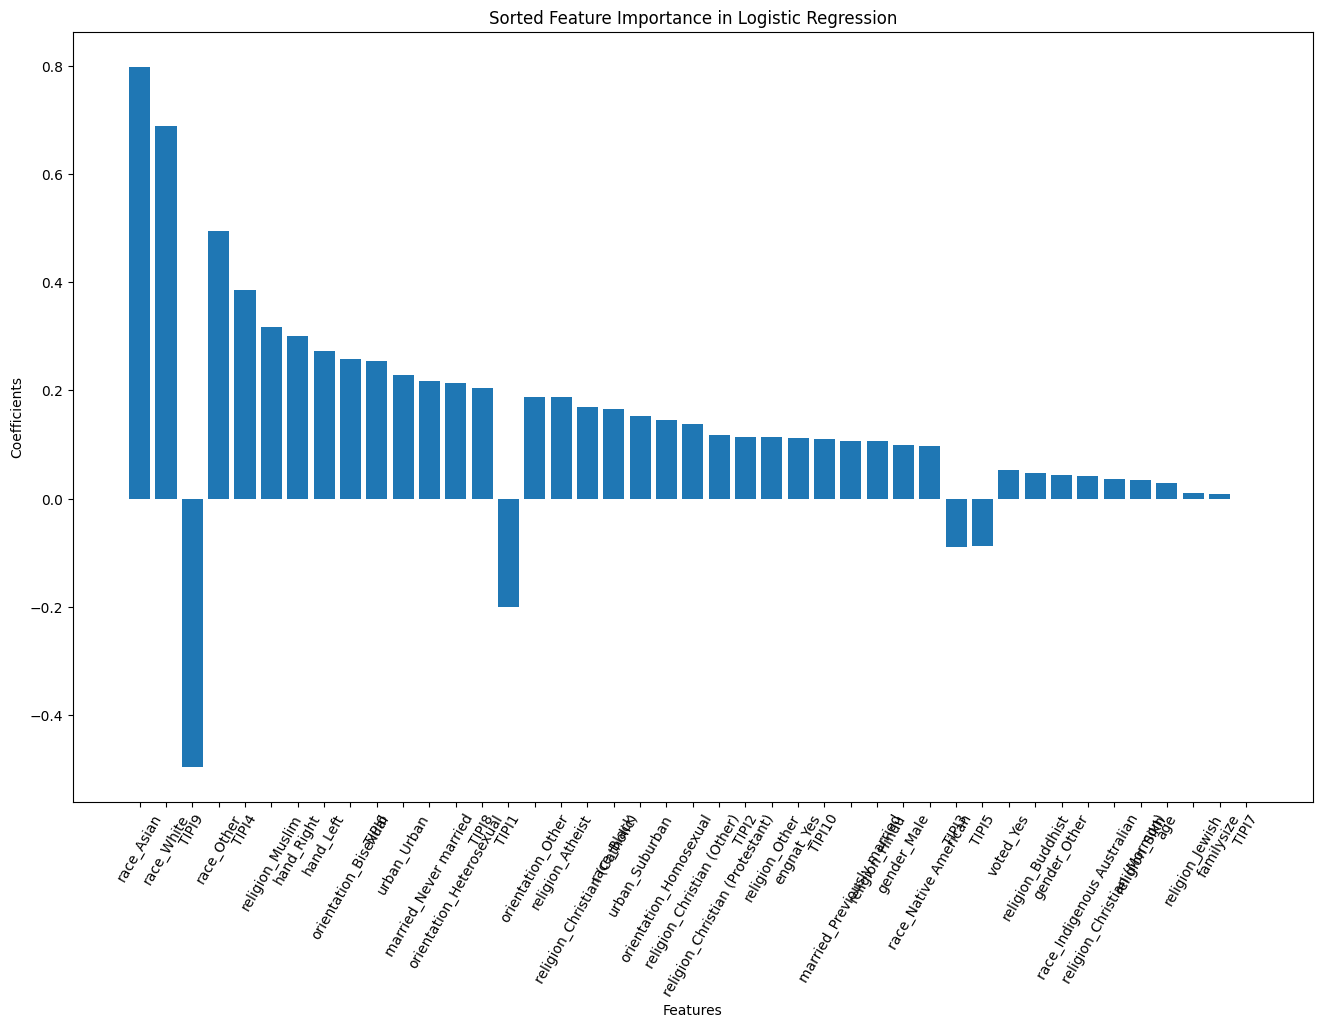

In [34]:
import matplotlib.pyplot as plt
# Extract coefficients and feature names
coefficients = logistic_reg_model_tipi.coef_[0]
feature_names = X_train_dep_tipi.columns

# Combine feature names and their corresponding coefficients
features_coefficients = zip(feature_names, coefficients)

# Sort the features by the absolute values of their coefficients
sorted_features = sorted(features_coefficients, key=lambda x: np.abs(x[1]), reverse=True)

# Separate the sorted feature names and their corresponding sorted coefficients
sorted_feature_names, sorted_coefficients = zip(*sorted_features)

# Create a sorted feature importance plot
plt.figure(figsize=(16, 10))
plt.bar(sorted_feature_names, sorted_coefficients)
plt.xticks(rotation=60)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Sorted Feature Importance in Logistic Regression')
plt.show()

Since XGBoost also had decent performance earlier, trying again with TIPI columns included

In [35]:
# Initialize XGBoost model
xgb_model_tipi = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data (SMOTE applied)
xgb_model_tipi.fit(X_train_dep_tipi_smote, y_train_dep_tipi_smote)

# Make predictions on the testing data
y_pred_xgb_tipi = xgb_model_tipi.predict(X_test_dep_tipi)

# Calculate the accuracy of the model
xgb_accuracy = accuracy_score(y_test_dep_tipi, y_pred_xgb_tipi)
print(f"Accuracy of the XGBoost model for depression severity prediction: {xgb_accuracy:.2f}")

# Print classification report for the XGBoost model
print("Classification Report for XGBoost Model:")
print(classification_report(y_test_dep_tipi, y_pred_xgb_tipi))

# Print confusion matrix for the XGBoost model
print("Confusion Matrix for XGBoost Model:")
print(confusion_matrix(y_test_dep_tipi, y_pred_xgb_tipi))

Accuracy of the XGBoost model for depression severity prediction: 0.44
Classification Report for XGBoost Model:
              precision    recall  f1-score   support

           0       0.54      0.71      0.61      2541
           1       0.19      0.12      0.15       713
           2       0.27      0.22      0.24      1389
           3       0.52      0.61      0.56      1721
           4       0.23      0.14      0.17      1303

    accuracy                           0.44      7667
   macro avg       0.35      0.36      0.35      7667
weighted avg       0.40      0.44      0.42      7667

Confusion Matrix for XGBoost Model:
[[1792   69  232  186  262]
 [ 183   87  150  233   60]
 [ 501   87  304  326  171]
 [ 204  141  241 1044   91]
 [ 639   73  214  200  177]]


Conclusion: Decent result and slightly better than Logistic regression (also classes more or less in balance).

Next: Trying to squeeze the maximum out of XGBoost Depression model on this test data, using XGBoost with hyperparameter tuning.

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import xgboost as xgb

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=make_scorer(accuracy_score),
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV
grid_search.fit(X_train_dep_tipi_smote, y_train_dep_tipi_smote)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.2f}")

# Make predictions with the best estimator
y_pred_best_xgb = grid_search.best_estimator_.predict(X_test_dep_tipi)

# Calculate the accuracy of the model
best_xgb_accuracy = accuracy_score(y_test_dep_tipi, y_pred_best_xgb)
print(f"Accuracy of the best XGBoost model: {best_xgb_accuracy:.2f}")

# Print classification report and confusion matrix
print("Classification Report for the Best XGBoost Model:")
print(classification_report(y_test_dep_tipi, y_pred_best_xgb))
print("Confusion Matrix for the Best XGBoost Model:")
print(confusion_matrix(y_test_dep_tipi, y_pred_best_xgb))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score: 0.52
Accuracy of the best XGBoost model: 0.44
Classification Report for the Best XGBoost Model:
              precision    recall  f1-score   support

           0       0.53      0.71      0.61      2541
           1       0.17      0.10      0.13       713
           2       0.26      0.21      0.23      1389
           3       0.52      0.61      0.57      1721
           4       0.22      0.12      0.16      1303

    accuracy                           0.44      7667
   macro avg       0.34      0.35      0.34      7667
weighted avg       0.40      0.44      0.41      7667

Confusion Matrix for the Best XGBoost Model:
[[1812   58  244  189  238]
 [ 183   73  140  247   70]
 [ 523  104  288  322  152]
 [ 227  127  218 1053   96]
 [ 648   67  233  195  160]]


After 24m of waiting for hyperparameter tuning (in Google Colab) found out that:
* Best parameters are {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
* Model accuracy is still 0.44 so no improvement there using the best parametrs

Final word for this notebook: Since preparing different versions of dataset (eg with or without SMOTE, with or without TIPI questions, with or without scaling) is very time-consuming, will try a "more programmatic" approach for data preparation in a different notebook.

P.S. It is evident that including TIPI / personality traits questions incrases model accuracy significantly.